In [ ]:
#importing libraries for data manupulation, extraction, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
data = pd.read_csv("/content/train.csv")


In [ ]:
print(data)

       applicant_age  income  ...       occupancy_type  accepted
0              45-54    26.0  ...  Principal residence         0
1              55-64   379.0  ...  Principal residence         0
2              45-54    86.0  ...  Principal residence         1
3              55-64    25.0  ...  Principal residence         1
4              65-74    33.0  ...  Principal residence         1
...              ...     ...  ...                  ...       ...
136256         55-64   330.0  ...  Investment property         0
136257         55-64   138.0  ...  Principal residence         1
136258         35-44   106.0  ...  Principal residence         0
136259         25-34    91.0  ...  Principal residence         1
136260         25-34   127.0  ...  Principal residence         1

[136261 rows x 6 columns]


In [ ]:
#getting the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136261 entries, 0 to 136260
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   applicant_age         136261 non-null  object 
 1   income                135228 non-null  float64
 2   debt_to_income_ratio  133472 non-null  object 
 3   loan_amount           136261 non-null  int64  
 4   occupancy_type        136261 non-null  object 
 5   accepted              136261 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.2+ MB


In [ ]:
data.head()

,applicant_age,income,debt_to_income_ratio,loan_amount,occupancy_type,accepted
0,45-54,26.0,>60%,95000,Principal residence,0
1,55-64,379.0,>60%,3225000,Principal residence,0
2,45-54,86.0,41%-<46%,105000,Principal residence,1
3,55-64,25.0,36%-<41%,65000,Principal residence,1
4,65-74,33.0,20%-<30%,75000,Principal residence,1


In [ ]:
#printing null entries in the dataset
data.isna().sum()

applicant_age              0
income                  1033
debt_to_income_ratio    2789
loan_amount                0
occupancy_type             0
accepted                   0
dtype: int64

**Cleaning**

In [ ]:
#dropping the null entries
data.dropna(inplace=True)
print(data)

       applicant_age  income  ...       occupancy_type  accepted
0              45-54    26.0  ...  Principal residence         0
1              55-64   379.0  ...  Principal residence         0
2              45-54    86.0  ...  Principal residence         1
3              55-64    25.0  ...  Principal residence         1
4              65-74    33.0  ...  Principal residence         1
...              ...     ...  ...                  ...       ...
136256         55-64   330.0  ...  Investment property         0
136257         55-64   138.0  ...  Principal residence         1
136258         35-44   106.0  ...  Principal residence         0
136259         25-34    91.0  ...  Principal residence         1
136260         25-34   127.0  ...  Principal residence         1

[132764 rows x 6 columns]


In [ ]:
#extracting the independent variables from the dataset 
x= data.iloc[:, :-1]
print(x)


       applicant_age  income  ... loan_amount       occupancy_type
0              45-54    26.0  ...       95000  Principal residence
1              55-64   379.0  ...     3225000  Principal residence
2              45-54    86.0  ...      105000  Principal residence
3              55-64    25.0  ...       65000  Principal residence
4              65-74    33.0  ...       75000  Principal residence
...              ...     ...  ...         ...                  ...
136256         55-64   330.0  ...      245000  Investment property
136257         55-64   138.0  ...      255000  Principal residence
136258         35-44   106.0  ...      135000  Principal residence
136259         25-34    91.0  ...      215000  Principal residence
136260         25-34   127.0  ...      235000  Principal residence

[132764 rows x 5 columns]


In [ ]:
#extracting the dependent variable from the dataset
y = data.iloc[:, -1]
print(y)

0         0
1         0
2         1
3         1
4         1
         ..
136256    0
136257    1
136258    0
136259    1
136260    1
Name: accepted, Length: 132764, dtype: int64


In [ ]:
#importing the encoding libraries
#we can classify the varibles into ordered classification, so we process the continuous data which is in ordered list and encode ito into discrete numeric data 
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data['applicant_age'].unique()

array(['45-54', '55-64', '65-74', '25-34', '35-44', '>74', '<25'],
      dtype=object)

In [ ]:
age_sort = ['<25', '25-34', '35-44', '45-54','55-64', '65-74','>74']
age_enc = OrdinalEncoder(categories=[age_sort])

In [ ]:
data['applicant_age']= age_enc.fit_transform(data['applicant_age'].values.reshape(-1,1))

In [ ]:
data['applicant_age'].value_counts()

1.0    46928
2.0    38628
3.0    23154
4.0    12269
0.0     6124
5.0     4622
6.0     1039
Name: applicant_age, dtype: int64

In [ ]:
data['debt_to_income_ratio'].unique()

array(['>60%', '41%-<46%', '36%-<41%', '20%-<30%', '46%-<50%', '30%-<36%',
       '<20%', '50%-60%'], dtype=object)

In [ ]:
debt_to_income_ratio_sort= ['<20%','20%-<30%','30%-<36%','36%-<41%','41%-<46%','46%-<50%','50%-60%','>60%']
debt_to_income_ratio_enc = OrdinalEncoder(categories=[debt_to_income_ratio_sort])

In [ ]:
data['debt_to_income_ratio']= debt_to_income_ratio_enc.fit_transform(data['debt_to_income_ratio'].values.reshape(-1,1))

In [ ]:
data['debt_to_income_ratio'].value_counts()

4.0    25943
3.0    22524
2.0    20724
1.0    19985
5.0    17490
6.0    15933
0.0     6024
7.0     4141
Name: debt_to_income_ratio, dtype: int64

**One - Hot Encoding**

In [ ]:
#this type of encoding is used to convert values which is unique, into numeric data 
dummies = pd.get_dummies(data['occupancy_type'])
dummies.head()

,Investment property,Principal residence,Second residence
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
#after encoding both dependent and independent variables, we concat them to make a complete dataset
data = pd.concat([data,dummies],axis=1)
data.head()

,applicant_age,income,debt_to_income_ratio,loan_amount,occupancy_type,accepted,Investment property,Principal residence,Second residence
0,3.0,26.0,7.0,95000,Principal residence,0,0,1,0
1,4.0,379.0,7.0,3225000,Principal residence,0,0,1,0
2,3.0,86.0,4.0,105000,Principal residence,1,0,1,0
3,4.0,25.0,3.0,65000,Principal residence,1,0,1,0
4,5.0,33.0,1.0,75000,Principal residence,1,0,1,0


In [ ]:
#we filter out the data which is not numeric and have already been encoded
data.drop(labels = ["occupancy_type"],axis=1,inplace=True)
data.head()

,applicant_age,income,debt_to_income_ratio,loan_amount,accepted,Investment property,Principal residence,Second residence
0,3.0,26.0,7.0,95000,0,0,1,0
1,4.0,379.0,7.0,3225000,0,0,1,0
2,3.0,86.0,4.0,105000,1,0,1,0
3,4.0,25.0,3.0,65000,1,0,1,0
4,5.0,33.0,1.0,75000,1,0,1,0


In [ ]:
#we filter out the independent variable for processing
X= data.drop(labels=["accepted"],axis =1)
print(X)

        applicant_age  income  ...  Principal residence  Second residence
0                 3.0    26.0  ...                    1                 0
1                 4.0   379.0  ...                    1                 0
2                 3.0    86.0  ...                    1                 0
3                 4.0    25.0  ...                    1                 0
4                 5.0    33.0  ...                    1                 0
...               ...     ...  ...                  ...               ...
136256            4.0   330.0  ...                    0                 0
136257            4.0   138.0  ...                    1                 0
136258            2.0   106.0  ...                    1                 0
136259            1.0    91.0  ...                    1                 0
136260            1.0   127.0  ...                    1                 0

[132764 rows x 7 columns]


In [ ]:
#we assign dependent variable to another variable for model training
Y = data["accepted"]
print(Y)

0         0
1         0
2         1
3         1
4         1
         ..
136256    0
136257    1
136258    0
136259    1
136260    1
Name: accepted, Length: 132764, dtype: int64


**Data representation/ visualization**

In [ ]:
from numpy.ma.extras import corrcoef
x_sample= data['accepted']
y_sample= data['applicant_age']
r = corrcoef(x_sample,y_sample)
print(r)


[[1.0 -0.037776982941898414]
 [-0.037776982941898414 1.0]]


In [ ]:
pd.crosstab(data['debt_to_income_ratio'],data['accepted'],margins=True)

accepted,0,1,All
debt_to_income_ratio,,,
0.0,933,5091,6024
1.0,1540,18445,19985
2.0,1503,19221,20724
3.0,1657,20867,22524
4.0,2139,23804,25943
5.0,1794,15696,17490
6.0,3121,12812,15933
7.0,3606,535,4141
All,16293,116471,132764


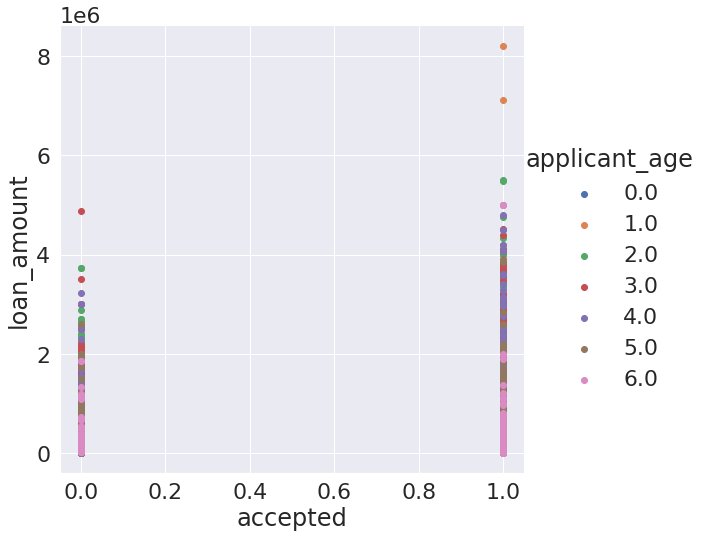

In [ ]:
#scatter representation

sns.FacetGrid(data,hue="applicant_age", height=8 ) \
.map(plt.scatter,"accepted", "loan_amount")\
.add_legend()
plt.show()

Correlation matrix

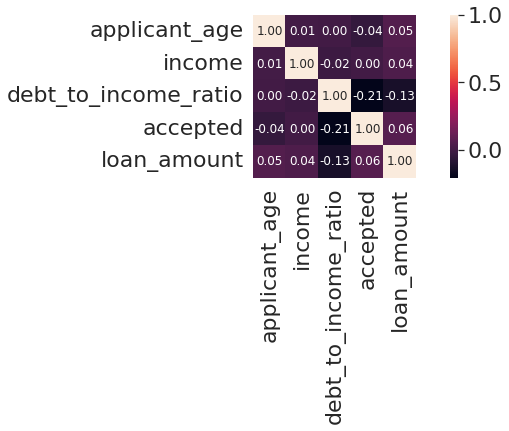

In [ ]:
from matplotlib.colorbar import Colorbar

#we use the corelation coefficient matrix to visualize corelation between each of the variable in the mortgage application
cols= ['applicant_age', 'income', 'debt_to_income_ratio','accepted','loan_amount' ]
f,ax = plt.subplots(figsize=(12,3))

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=2)
hm=sns.heatmap(cm,
               cbar = True,
               annot = True,
               square = True,
               fmt = '.2f',
               annot_kws ={'size':12},
               yticklabels=cols,
               xticklabels=cols)
plt.show()

**Creating the training , validation, and testing data**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#we split the dataset into two groups, 80% for validation and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state =0)

**Testing models using various algorithm**

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1, max_iter=1000)
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
Y_pred = logreg.predict(X_val)

In [ ]:
data['accepted'].value_counts()


1    116471
0     16293
Name: accepted, dtype: int64

In [ ]:
print(str(data['accepted'].value_counts()[1]/(data['accepted'].value_counts()[1]+data['accepted'].value_counts()[0])*100)+"% of entries correspond to accepted loans")

87.72784791057818% of entries correspond to accepted loans


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print("Accuracy: ", accuracy_score(Y_val, Y_pred))

Accuracy:  0.8794897142588146


In [ ]:
print("Precision: ", precision_score(Y_val, Y_pred))

Precision:  0.8794897142588146


In [ ]:
print("recall value: ",recall_score(Y_val, Y_pred))

recall value:  1.0


In [ ]:
#obtaining report

from sklearn import metrics
print(metrics.classification_report(Y_val,Y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2560
           1       0.88      1.00      0.94     18683

    accuracy                           0.88     21243
   macro avg       0.44      0.50      0.47     21243
weighted avg       0.77      0.88      0.82     21243



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#report in the form of count matrix
print(metrics.confusion_matrix(Y_val,Y_pred))

[[    0  2560]
 [    0 18683]]


**Random forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R_forest = RandomForestClassifier()

In [ ]:
#training
R_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#Training accuracy
R_forest.score(X_train,Y_train)

0.962774220883156

In [ ]:
#testing accuracy
R_forest.score(X_test, Y_test)

0.8788837419500621

In [ ]:
Y_pred = R_forest.predict(X_val)

In [ ]:
print("Accuracy: ", accuracy_score(Y_val, Y_pred))

Accuracy:  0.8808548698394766


In [ ]:
print("precision: ", precision_score(Y_val, Y_pred))

precision:  0.9118306986231515


In [ ]:
print("recall Value: ", recall_score(Y_val, Y_pred))

recall Value:  0.9570732751699406


In [ ]:
print(metrics.classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.32      0.40      2560
           1       0.91      0.96      0.93     18683

    accuracy                           0.88     21243
   macro avg       0.71      0.64      0.67     21243
weighted avg       0.86      0.88      0.87     21243



In [ ]:
print(metrics.confusion_matrix(Y_val, Y_pred))

[[  831  1729]
 [  802 17881]]


***Decision Tree ***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier()

In [ ]:
D_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#training
D_tree.score(X_train,Y_train)

0.9627859900197722

In [ ]:
#testing
D_tree.score(X_test,Y_test)

0.8365156479493843

In [ ]:
Y_pred = D_tree.predict(X_val)

In [ ]:
print("Accuracy: ", accuracy_score(Y_val, Y_pred))

Accuracy:  0.8339217624629289


In [ ]:
print("precision: ", precision_score(Y_val, Y_pred))

precision:  0.9104598884134121


In [ ]:
print("recall Value: ", recall_score(Y_val, Y_pred))

recall Value:  0.8996413852165069


In [ ]:
print(metrics.classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      2560
           1       0.91      0.90      0.91     18683

    accuracy                           0.83     21243
   macro avg       0.62      0.63      0.62     21243
weighted avg       0.84      0.83      0.84     21243



In [ ]:
print(metrics.confusion_matrix(Y_val,Y_pred))

[[  907  1653]
 [ 1875 16808]]


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
s_vector = SVC()


In [ ]:
s_vector.fit(X_train,Y_train)

SVC()

In [ ]:
#training
s_vector.score(X_train,Y_train)

0.877047829771208

In [ ]:
#testing
s_vector.score(X_test,Y_test)


0.8762475049900199

In [ ]:
Y_pred= s_vector.predict(X_val)

In [ ]:
print("Accuracy: ", accuracy_score(Y_val, Y_pred))

Accuracy:  0.8794897142588146


In [ ]:
print("precision: ", precision_score(Y_val, Y_pred))

precision:  0.8794897142588146


In [ ]:
print("recall Value: ", recall_score(Y_val, Y_pred))

recall Value:  1.0


In [ ]:
print(metrics.classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2560
           1       0.88      1.00      0.94     18683

    accuracy                           0.88     21243
   macro avg       0.44      0.50      0.47     21243
weighted avg       0.77      0.88      0.82     21243



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.confusion_matrix(Y_val,Y_pred))

[[    0  2560]
 [    0 18683]]
